In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#GBM Parameters

s0 = 100
mu = 0.0
sigma = 0.25

#Other Metrics
paths = 1000
delta = 1.0/252
time = 252*5

In [3]:
def wiener_process(delta, sigma, time, paths):
    
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

In [4]:
def get_gbm(delta, sigma, time, paths, mu):

    process = wiener_process(delta, sigma, time, paths)
    
    return np.exp((mu-(sigma**2)/2)*delta + process)
    

In [5]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
    
    returns = get_gbm(delta, sigma, time, paths, mu)
    
    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

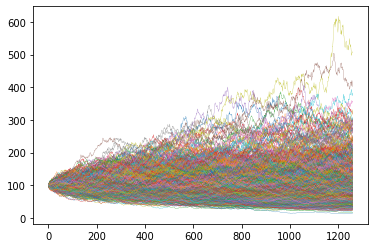

In [6]:
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)

plt.plot(price_paths, linewidth=0.25)
plt.show()